In [1]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import geopandas as gpd

# connect to the API
api = SentinelAPI('user', 'pw', 'https://apihub.copernicus.eu/apihub/')

In [2]:
footprint= gpd.read_file("aoi_4326.geojson", driver='GeoJSON')

In [3]:
footprint.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

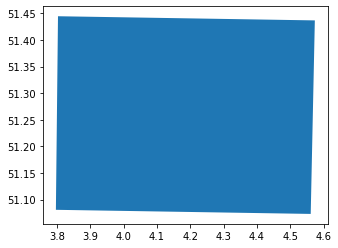

In [4]:
footprint.plot()

In [5]:
footprint = geojson_to_wkt(read_geojson("aoi_4326.geojson"))

In [6]:
footprint

'POLYGON((3.8026 51.4445,4.5739 51.4367,4.5616 51.0730,3.7963 51.0807,3.8026 51.4445))'

##### S2 

In [7]:
s2products = api.query(footprint,
                     date = ('20210101', '20210120'),
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0, 20))

In [28]:
len(s2products)

3

In [29]:
s2products_df = api.to_dataframe(s2products)

In [30]:
s2products_df

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,platformserialidentifier,processinglevel,identifier,uuid,datatakesensingstart,sensoroperationalmode,tileid,hv_order_tileid,granuleidentifier,datastripidentifier
75bc0406-d7cc-462d-9a1e-9f4529c7fd41,S2B_MSIL2A_20210113T110319_N0214_R094_T31UET_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-13T11:03:19.024Z, Instrument: MS...",false,2021-01-13 11:03:19.024,2021-01-13 11:03:19.024,2021-01-13 20:41:00.911,20140,...,Sentinel-2B,Level-2A,S2B_MSIL2A_20210113T110319_N0214_R094_T31UET_2...,75bc0406-d7cc-462d-9a1e-9f4529c7fd41,NaT,NaN,NaN,NaN,NaN,NaN
952aba15-eb66-4abf-95d0-ddbdf8f739f4,S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-13T11:03:19.024Z, Instrument: MS...",false,2021-01-13 11:03:19.024,2021-01-13 11:03:19.024,2021-01-13 14:34:09.022,20140,...,Sentinel-2B,Level-1C,S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_2...,952aba15-eb66-4abf-95d0-ddbdf8f739f4,2021-01-13 11:03:19.024,INS-NOBS,31UET,UT31E,S2B_OPER_MSI_L1C_TL_EPAE_20210113T115914_A0201...,S2B_OPER_MSI_L1C_DS_EPAE_20210113T115914_S2021...
5392988e-5033-49c9-a3dd-fb379292e1bb,S2B_MSIL1C_20210110T105329_N0209_R051_T31UES_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-10T10:53:29.024Z, Instrument: MS...",false,2021-01-10 10:53:29.024,2021-01-10 10:53:29.024,2021-01-10 15:23:26.906,20097,...,Sentinel-2B,Level-1C,S2B_MSIL1C_20210110T105329_N0209_R051_T31UES_2...,5392988e-5033-49c9-a3dd-fb379292e1bb,2021-01-10 10:53:29.024,INS-NOBS,31UES,US31E,S2B_OPER_MSI_L1C_TL_VGS2_20210110T130049_A0200...,S2B_OPER_MSI_L1C_DS_VGS2_20210110T130049_S2021...


In [31]:
api.download_all(s2products_df.index)

Fetching archival status: 100%|███████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.01 products/s]
Downloading:   0%|                                                                          | 0.00/515M [00:00<?, ?B/s]
Downloading:   0%|▏                                                                 | 1.05M/515M [00:01<16:10, 530kB/s]
Downloading:   1%|▌                                                                 | 4.19M/515M [00:06<13:18, 640kB/s]
Downloading:   1%|▊                                                                 | 6.29M/515M [00:10<14:54, 569kB/s]
Downloading:   0%|▎                                                                 | 3.15M/649M [00:10<37:50, 284kB/s]
Downloading:   1%|▉                                                                 | 7.34M/515M [00:13<16:23, 517kB/s]
Downloading:   2%|█                                                                 | 8.39M/515M [00:15<16:51, 501kB/s]
Downloading:   2%|█▏                    

Downloading:  12%|████████▏                                                         | 64.0M/515M [01:53<13:03, 576kB/s]
Downloading:  13%|████████▎                                                         | 65.0M/515M [01:56<14:15, 527kB/s]
Downloading:  11%|███████                                                           | 69.2M/649M [01:56<15:30, 623kB/s]
Downloading:  11%|███████▏                                                          | 70.3M/649M [01:57<14:04, 685kB/s]
Downloading:  13%|████████▍                                                         | 66.1M/515M [01:59<16:21, 458kB/s]
Downloading:  11%|███████▎                                                          | 72.4M/649M [02:00<12:45, 753kB/s]
Downloading:  13%|████████▌                                                         | 67.1M/515M [02:01<17:26, 428kB/s]
Downloading:  13%|████████▋                                                         | 68.2M/515M [02:04<17:08, 435kB/s]
Downloading:  12%|███████▋              

Downloading:  25%|████████████████▍                                                  | 127M/515M [03:48<08:30, 761kB/s]
Downloading:  25%|████████████████▋                                                  | 128M/515M [03:50<08:44, 739kB/s]
Downloading:  25%|████████████████▊                                                  | 129M/515M [03:52<09:36, 671kB/s]
Downloading:  25%|█████████████████                                                  | 131M/515M [03:55<09:14, 693kB/s]
Downloading:  26%|█████████████████▎                                                 | 133M/515M [03:57<08:24, 757kB/s]
Downloading:  26%|█████████████████▌                                                 | 135M/515M [04:00<08:08, 779kB/s]
Downloading:  26%|█████████████████▋                                                 | 136M/515M [04:02<08:40, 728kB/s]
Downloading:  27%|█████████████████▊                                                 | 137M/515M [04:03<09:15, 681kB/s]
Downloading:  22%|██████████████▉       

Downloading:  39%|█████████████████████████▉                                         | 199M/515M [05:51<07:30, 702kB/s]
Downloading:  39%|██████████████████████████                                         | 200M/515M [05:52<08:09, 644kB/s]
Downloading:  39%|██████████████████████████▎                                        | 202M/515M [05:56<08:50, 590kB/s]
Downloading:  39%|██████████████████████████▍                                        | 203M/515M [05:58<08:31, 610kB/s]
Downloading:  40%|██████████████████████████▋                                        | 206M/515M [06:01<07:31, 687kB/s]
Downloading:  40%|██████████████████████████▊                                        | 207M/515M [06:02<07:34, 679kB/s]
Downloading:  40%|██████████████████████████▉                                        | 208M/515M [06:04<08:05, 634kB/s]
Downloading:  40%|███████████████████████████                                        | 209M/515M [06:06<08:50, 579kB/s]
Downloading:  41%|██████████████████████

Downloading:  42%|████████████████████████████▍                                      | 275M/649M [07:48<08:17, 751kB/s]
Downloading:  52%|███████████████████████████████████▏                               | 271M/515M [07:50<08:31, 478kB/s]
Downloading:  43%|████████████████████████████▌                                      | 277M/649M [07:50<07:12, 859kB/s]
Downloading:  43%|████████████████████████████▋                                      | 278M/649M [07:51<06:52, 899kB/s]
Downloading:  53%|███████████████████████████████████▎                               | 272M/515M [07:53<09:27, 429kB/s]
Downloading:  43%|████████████████████████████▉                                      | 280M/649M [07:53<06:44, 911kB/s]
Downloading:  53%|███████████████████████████████████▍                               | 273M/515M [07:55<09:01, 448kB/s]
Downloading:  53%|███████████████████████████████████▌                               | 274M/515M [07:57<08:28, 475kB/s]
Downloading:  54%|██████████████████████

Downloading:  66%|████████████████████████████████████████████▏                      | 340M/515M [09:41<05:03, 580kB/s]
Downloading:  66%|████████████████████████████████████████████▎                      | 341M/515M [09:43<05:20, 545kB/s]
Downloading:  53%|███████████████████████████████████▋                               | 346M/649M [09:44<08:30, 592kB/s]
Downloading:  66%|████████████████████████████████████████████▍                      | 342M/515M [09:46<06:08, 471kB/s]
Downloading:  67%|████████████████████████████████████████████▌                      | 343M/515M [09:48<05:38, 510kB/s]
Downloading:  67%|████████████████████████████████████████████▊                      | 345M/515M [09:52<05:09, 551kB/s]
Downloading:  54%|████████████████████████████████████▏                              | 350M/649M [09:52<09:02, 550kB/s]
Downloading:  67%|████████████████████████████████████████████▉                      | 346M/515M [09:54<05:28, 515kB/s]
Downloading:  67%|██████████████████████

Downloading:  64%|██████████████████████████████████████████▋                        | 413M/649M [11:26<06:14, 628kB/s]
Downloading:  76%|███████████████████████████████████████████████████▏               | 394M/515M [11:28<03:51, 523kB/s]
Downloading:  77%|███████████████████████████████████████████████████▍               | 395M/515M [11:30<03:32, 566kB/s]
Downloading:  77%|███████████████████████████████████████████████████▌               | 396M/515M [11:32<03:24, 582kB/s]
Downloading:  77%|███████████████████████████████████████████████████▋               | 397M/515M [11:33<03:22, 583kB/s]
Downloading:  77%|███████████████████████████████████████████████████▊               | 398M/515M [11:35<03:23, 576kB/s]
Downloading:  78%|███████████████████████████████████████████████████▉               | 400M/515M [11:37<03:25, 565kB/s]
Downloading:  78%|████████████████████████████████████████████████████               | 401M/515M [11:39<03:28, 552kB/s]
Downloading:  78%|██████████████████████

Downloading:  90%|████████████████████████████████████████████████████████████▌      | 466M/515M [13:30<01:14, 666kB/s]
Downloading:  91%|████████████████████████████████████████████████████████████▋      | 467M/515M [13:31<01:15, 644kB/s]
Downloading:  75%|██████████████████████████████████████████████████                 | 484M/649M [13:32<04:51, 562kB/s]
Downloading:  91%|████████████████████████████████████████████████████████████▊      | 468M/515M [13:34<01:24, 565kB/s]
Downloading:  91%|████████████████████████████████████████████████████████████▉      | 469M/515M [13:36<01:28, 529kB/s]
Downloading:  91%|█████████████████████████████████████████████████████████████      | 470M/515M [13:37<01:19, 573kB/s]
Downloading:  91%|█████████████████████████████████████████████████████████████▏     | 471M/515M [13:40<01:22, 540kB/s]
Downloading:  76%|██████████████████████████████████████████████████▌                | 490M/649M [13:40<04:15, 623kB/s]
Downloading:  92%|██████████████████████

MD5 checksumming:  52%|███████████████████████████████▋                             | 268M/515M [00:19<00:18, 13.1MB/s]
MD5 checksumming:  54%|█████████████████████████████████                            | 280M/515M [00:20<00:16, 14.0MB/s]
MD5 checksumming:  57%|██████████████████████████████████▊                          | 294M/515M [00:21<00:15, 14.3MB/s]
MD5 checksumming:  60%|████████████████████████████████████▎                        | 307M/515M [00:22<00:14, 14.4MB/s]
MD5 checksumming:  63%|██████████████████████████████████████▍                      | 325M/515M [00:23<00:12, 14.7MB/s]
MD5 checksumming:  66%|████████████████████████████████████████▍                    | 341M/515M [00:24<00:11, 14.6MB/s]
MD5 checksumming:  70%|██████████████████████████████████████████▌                  | 359M/515M [00:25<00:10, 14.4MB/s]
MD5 checksumming:  73%|████████████████████████████████████████████▏                | 374M/515M [00:27<00:09, 14.5MB/s]
MD5 checksumming:  75%|█████████████████

Downloading:  96%|███████████████████████████████████████████████████████████████   | 620M/649M [16:22<00:26, 1.09MB/s]
Downloading:  96%|███████████████████████████████████████████████████████████████▏  | 621M/649M [16:23<00:26, 1.04MB/s]
Downloading:  96%|████████████████████████████████████████████████████████████████▏  | 622M/649M [16:25<00:27, 970kB/s]
Downloading:  96%|████████████████████████████████████████████████████████████████▎  | 623M/649M [16:26<00:26, 986kB/s]
Downloading:  96%|████████████████████████████████████████████████████████████████▍  | 624M/649M [16:27<00:25, 971kB/s]
Downloading:  96%|████████████████████████████████████████████████████████████████▌  | 625M/649M [16:28<00:24, 957kB/s]
Downloading:  97%|████████████████████████████████████████████████████████████████▋  | 626M/649M [16:29<00:23, 948kB/s]
Downloading:  97%|████████████████████████████████████████████████████████████████▊  | 627M/649M [16:30<00:22, 954kB/s]
Downloading:  97%|██████████████████████

({'952aba15-eb66-4abf-95d0-ddbdf8f739f4': {'id': '952aba15-eb66-4abf-95d0-ddbdf8f739f4',
   'title': 'S2B_MSIL1C_20210113T110319_N0209_R094_T31UET_20210113T115914',
   'size': 515454856,
   'md5': '95ecefa5f0cae6e572ad4b10374d1356',
   'date': datetime.datetime(2021, 1, 13, 11, 3, 19, 24000),
   'footprint': 'POLYGON((4.339845138211645 52.34133618715632,4.280259146295085 52.23113729463056,4.202973778021864 52.087285744809606,4.126620672807489 51.94342777532778,4.050866814137378 51.799569984604624,3.975736358766384 51.65565062521242,3.900776129260918 51.511703439393806,3.826180700963278 51.36770114344026,3.821048752944145 51.35771624647961,2.999712727409819 51.36324170782969,2.999706370881351 52.3504731573947,4.339845138211645 52.34133618715632))',
   'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('952aba15-eb66-4abf-95d0-ddbdf8f739f4')/$value",
   'Online': True,
   'Creation Date': datetime.datetime(2021, 1, 13, 14, 35, 11, 485000),
   'Ingestion Date': datetime.datetim

In [32]:
#api.download_all(s2products)

##### S1

In [37]:
s1products = api.query(footprint,
                     date=('20210101', '20210104'),
                     platformname='Sentinel-1',
                     polarisationmode='VV VH',
                     sensoroperationalmode='IW',
                     orbitdirection='DESCENDING')

In [38]:
len(s1products)

4

In [39]:
s1products_df = api.to_dataframe(s1products)

In [48]:
S1= s1products_df.head(1)
S1

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,platformname,platformidentifier,instrumentname,instrumentshortname,productclass,polarisationmode,acquisitiontype,gmlfootprint,footprint,uuid
1c7a8848-0724-4be9-a5c7-f48f49fca62e,S1B_IW_SLC__1SDV_20210103T055800_20210103T0558...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-01-03T05:58:00.051Z, Instrument: SA...",false,2021-01-03 05:58:00.051,2021-01-03 05:58:27.150,2021-01-03 11:05:40.869,194890,...,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((5.266184 50.274563, 5.794876 5...",1c7a8848-0724-4be9-a5c7-f48f49fca62e


In [49]:
api.download_all(S1.index)

Fetching archival status: 100%|███████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.42 products/s]
Downloading: 100%|███████████████████████████████████████████████████████████████| 4.28G/4.28G [1:14:12<00:00, 962kB/s]
MD5 checksumming: 100%|███████████████████████████████████████████████████████████| 4.28G/4.28G [03:56<00:00, 18.1MB/s]


({'1c7a8848-0724-4be9-a5c7-f48f49fca62e': {'id': '1c7a8848-0724-4be9-a5c7-f48f49fca62e',
   'title': 'S1B_IW_SLC__1SDV_20210103T055800_20210103T055827_024986_02F94A_9A6F',
   'size': 4282437351,
   'md5': 'd903ab3e24cf0a5cd32e86ddc80f45c4',
   'date': datetime.datetime(2021, 1, 3, 5, 58, 0, 51000),
   'footprint': 'POLYGON((5.266184 50.274563,1.629431 50.682274,2.024864 52.303623,5.794876 51.893219,5.266184 50.274563))',
   'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('1c7a8848-0724-4be9-a5c7-f48f49fca62e')/$value",
   'Online': True,
   'Creation Date': datetime.datetime(2021, 1, 3, 11, 10, 8, 935000),
   'Ingestion Date': datetime.datetime(2021, 1, 3, 11, 5, 40, 869000),
   'quicklook_url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('1c7a8848-0724-4be9-a5c7-f48f49fca62e')/Products('Quicklook')/$value",
   'path': 'S1B_IW_SLC__1SDV_20210103T055800_20210103T055827_024986_02F94A_9A6F.zip',
   'downloaded_bytes': 4282437351}},
 {},
 {})

In [50]:
#api.download_all(s1products)